# EDA and Clustering algorithm
This notebook performs analysis of a dataset containing customer shopping behaviour
data, focusing on various features such as Gender, Age, Annual Income, and Spending Score.

It aims to unearth underlying patterns in consumer profiles that could facilitate enhanced
marketing strategies.

## Task 1: Data Loading and Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer

from itertools import product

import plotly.express as px

import warnings
warnings.filterwarnings('ignore') # Ignore warnings to clean up output

### 1.1 Loading Data

In [2]:
# Load data
df = pd.read_csv('customers.csv')
print(f"Data shape: {df.shape}")

# Display the first few rows of the dataframe
df.head()

Data shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Check for any missing values in the dataset
df.isnull().any().sum()

0

In [4]:
# Drop the 'CustomerID' column as it's just an identifier and not useful for analysis
df.drop('CustomerID', axis=1, inplace=True)
df.head() # Display the dataframe after dropping 'CustomerID'

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
# Define categorical and numerical features
categorical_features = ['Gender']
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [6]:
# Create a dataframe with numerical features only
X_numeric = df[numerical_features]

### 1.2 Descriptive Statistical Analysis and Graphs

In [7]:
# Generate descriptive statistics of the dataframe
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


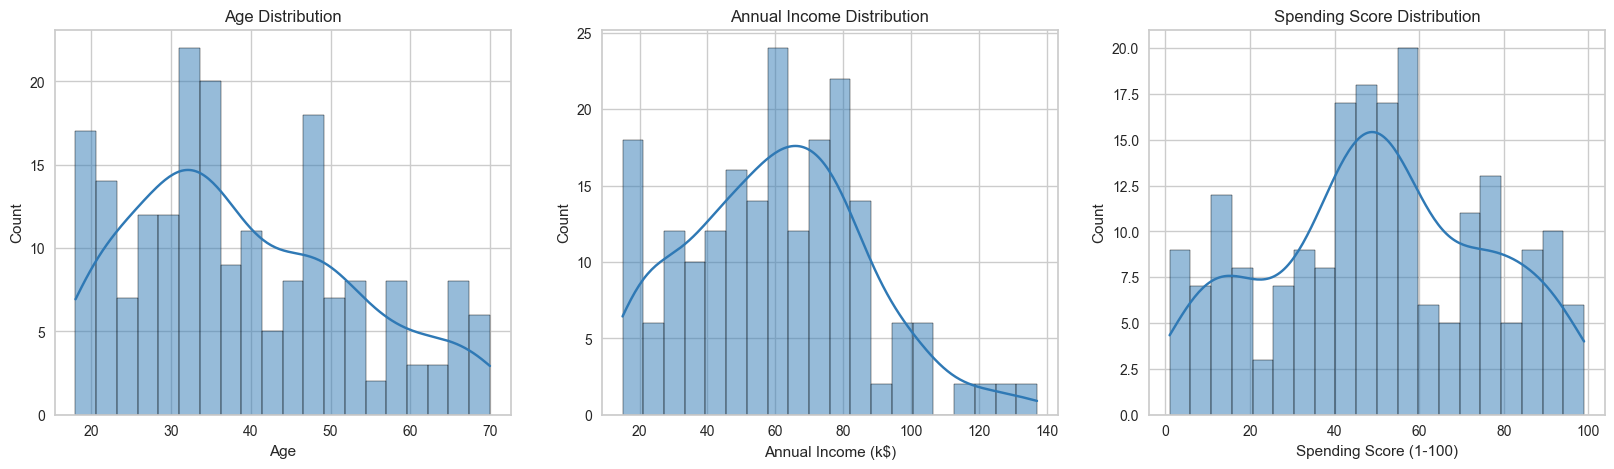

In [8]:
# Visualization of distributions
plt.figure(figsize=(20, 5))

# Histograms for Age, Annual Income and Spending Score
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, bins=20, color='#2f79b5')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde=True, bins=20, color='#2f79b5')
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=20, color='#2f79b5')
plt.title('Spending Score Distribution')

plt.show()

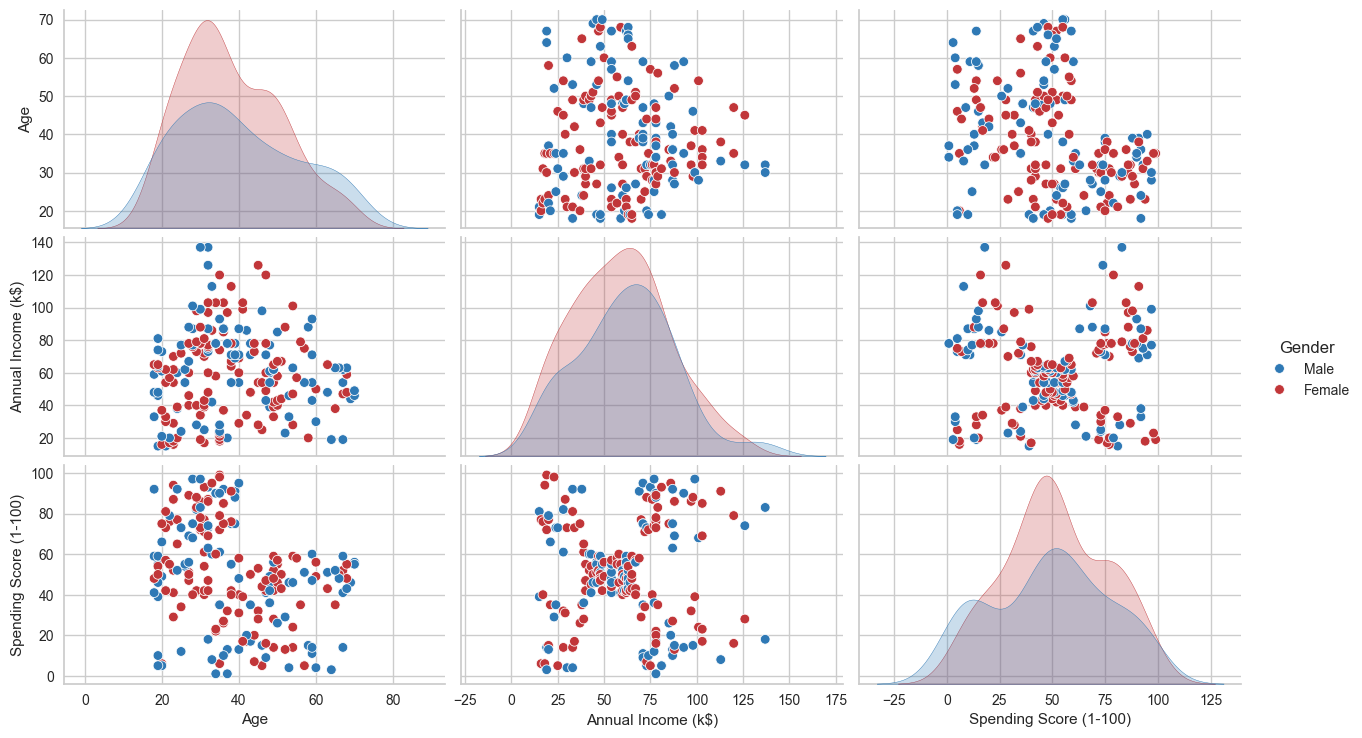

In [9]:
# Pairplot to visualize the distribution and relationships by Gender
sns.pairplot(df[['Gender','Age', 'Annual Income (k$)','Spending Score (1-100)']],
            hue='Gender',
            palette=['#2f79b5','#c13639'], aspect=1.7)
plt.show()

### 1.3 Correlations and Dimensionality Reduction

#### Correlations

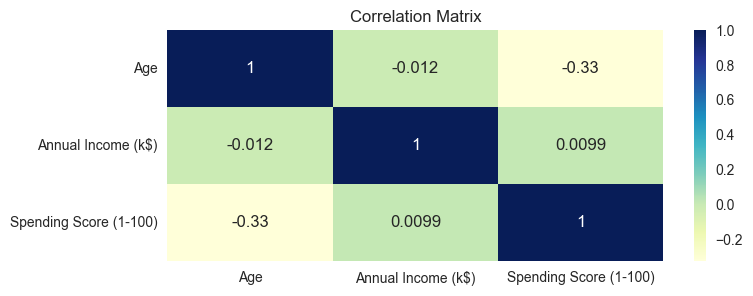

In [10]:
# Correlation matrix to explore potential linear relationships between numerical features
corr_matrix = X_numeric.corr()
plt.figure(figsize=(8, 3))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title('Correlation Matrix')
plt.show()

#### Dimensionality Reduction

In [11]:
# PCA Transformation for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_numeric)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [12]:
# Applying K-means clustering for color coding
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(principal_df)

[0.45125272 0.44098465]


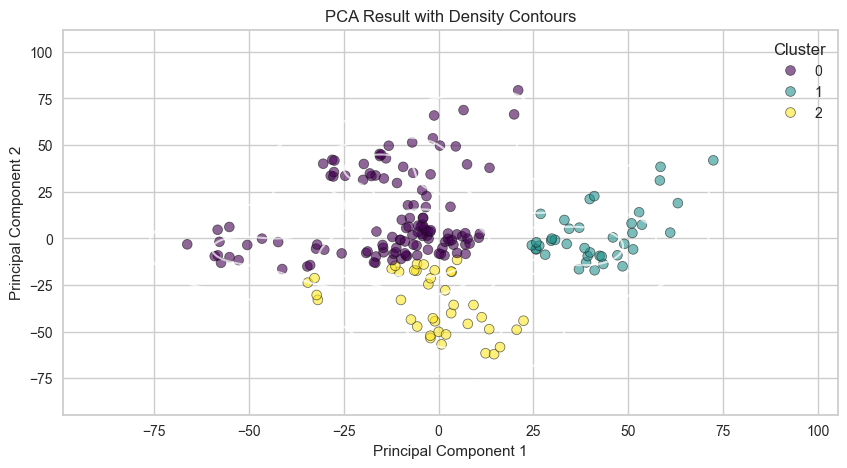

In [13]:
# Explained variance ratio
print(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
# Density and scatter plot for visualizing PCA results
sns.kdeplot(x=principal_df['PC1'], y=principal_df['PC2'], levels=5, color='w', linewidths=1.5, alpha=0.7)
sns.scatterplot(x='PC1', y='PC2', data=principal_df, hue=df['Cluster'], palette='viridis', alpha=0.6, edgecolor='k')
plt.title('PCA Result with Density Contours')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

## Task 2 – Clustering

### Kmeans clustering algorithms

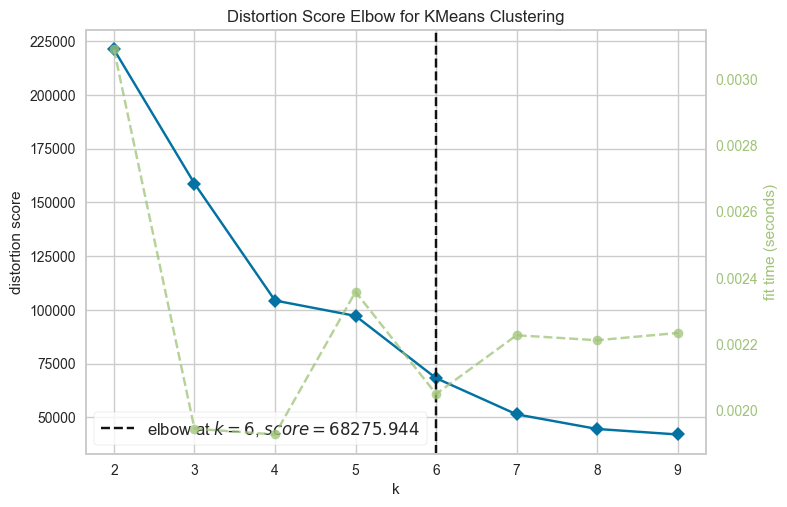

In [14]:
# Using the Elbow method to determine the optimal number of clusters for K-means
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_numeric)
visualizer.show()
plt.show()

In [15]:

# KMeans clustering with 6 clusters
KM = KMeans(n_clusters=6, init='k-means++', random_state=3407).fit(X_numeric)

KM_clustered = X_numeric.copy()
KM_clustered.loc[:,'Cluster'] = KM.labels_ # append labels to points

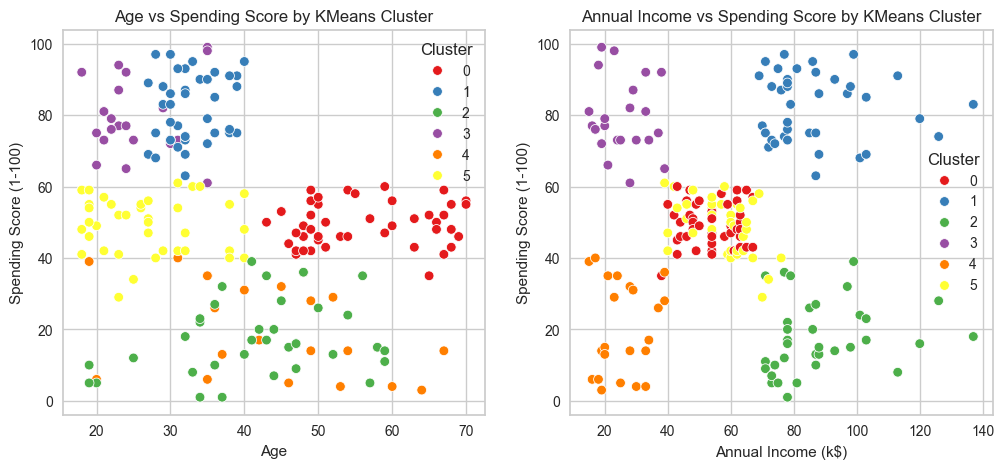

In [16]:
# Scatter plots for visualizing clusters based on Age vs. Spending Score and Annual Income vs. Spending Score
fig1, (ax_af) = plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=KM_clustered,
                hue='Cluster', ax=ax_af[0], palette='Set1', legend='full')
ax_af[0].set_title('Age vs Spending Score by KMeans Cluster')  

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=KM_clustered,
                hue='Cluster', palette='Set1', ax=ax_af[1], legend='full')
ax_af[1].set_title('Annual Income vs Spending Score by KMeans Cluster')

plt.setp(ax_af[0].get_legend().get_texts(), fontsize='10')
plt.setp(ax_af[1].get_legend().get_texts(), fontsize='10')
plt.show()

K-Means algorithm generated the following 6 clusters:
* clients with **low** annual income, **low** spending score and **medium to high** age
* clients with **low** annual income, **high** spending score and **low** age
* clients with **medium** annual income, **medium** spending score and **low to medium** age
* clients with **medium** annual income, **medium** spending score and **medium to high** age
* clients with **high** annual income, **high** spending score and **medium** age
* clients with **high** annual income, **low** spending score and **vary** in age

In [17]:
#  Create a new datafram with the cluster labels from the KMeans results
KM_clustered.groupby('Cluster').size()

Cluster
0    44
1    39
2    35
3    22
4    22
5    38
dtype: int64

In [18]:
# Silhouette scores for evaluating clustering quality
KM_silhouette = silhouette_score(X_numeric, KM.labels_)
print(f'Silhouette Score for K-means: {KM_silhouette}')

Silhouette Score for K-means: 0.4523566166018854


In [19]:
# Convert cluster 0 to 6 for plotting
KM_clustered['Cluster'] = KM_clustered['Cluster'].replace(0, 6)

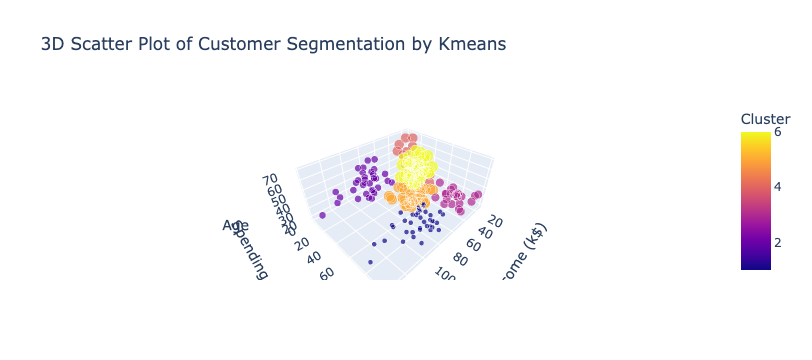

In [20]:
# 3D scatter plot for visualizing customer segmentation
fig = px.scatter_3d(KM_clustered, x="Annual Income (k$)", y="Spending Score (1-100)", z="Age",
                    color = 'Cluster', size = 'Cluster', title="3D Scatter Plot of Customer Segmentation by Kmeans")
fig.show()

### DBSCAN clustering algorithms

In [21]:
# Define ranges for DBSCAN parameters: 'eps' and 'min_samples'
eps_values = np.arange(8,15,0.25) 
min_samples = np.arange(2,10) 

# Create a list of parameter combinations for DBSCAN using Cartesian product
DBSCAN_params = list(product(eps_values, min_samples))

In [22]:
# Lists to store the number of clusters and silhouette scores for each parameter combination
no_of_clusters = []
sil_score = []

# Loop through each parameter combination, apply DBSCAN clustering, and store results
for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numeric)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numeric, DBS_clustering.labels_))

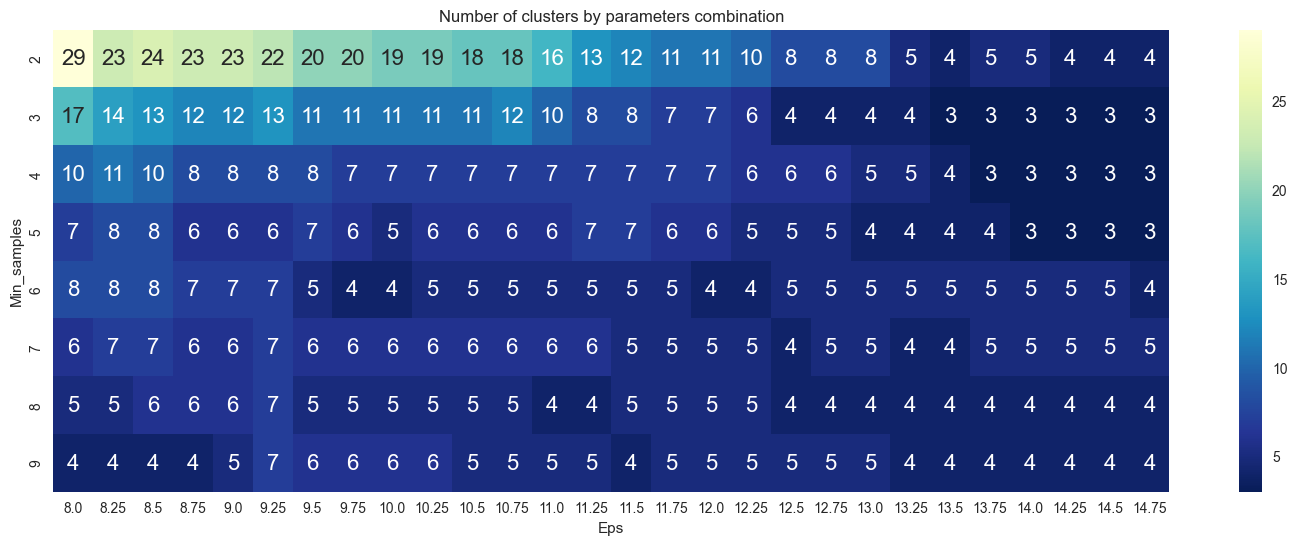

In [23]:
# Create a dataframe to hold the parameter combinations and the results (number of clusters)
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

# Create a pivot table to visualize the number of clusters as a function of 'eps' and 'min_samples'
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu_r", ax=ax)
ax.set_title('Number of clusters by parameters combination')
plt.show()

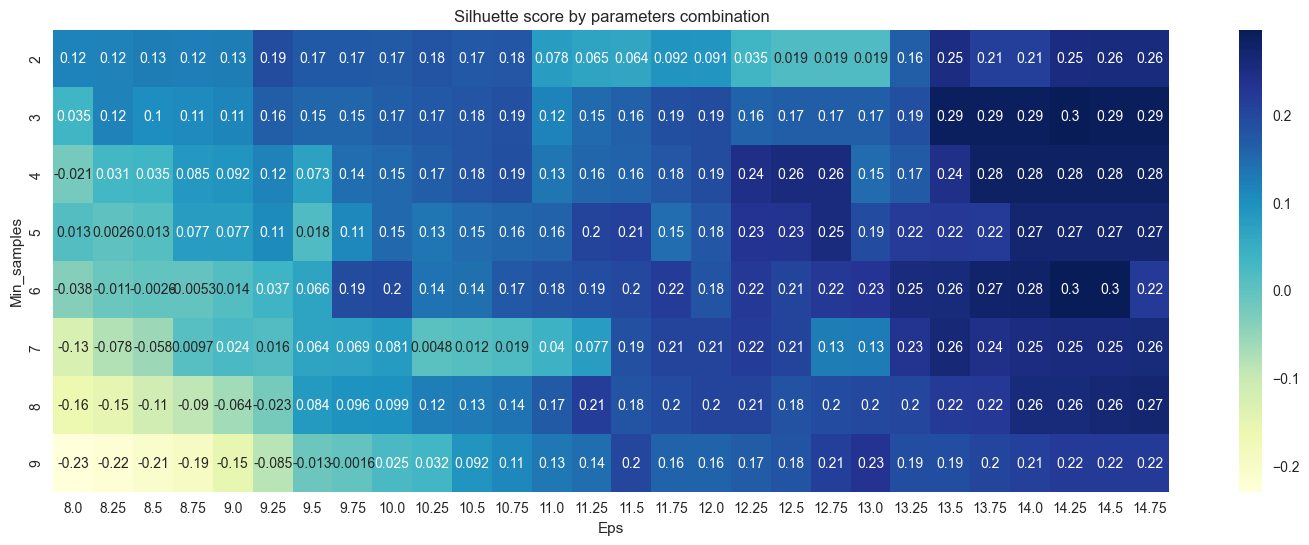

In [24]:
# Add silhouette scores to the dataframe
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

# Create a pivot table to visualize the silhouette scores as a function of 'eps' and 'min_samples'
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
ax.set_title('Silhuette score by parameters combination')
plt.show()

In [25]:
# Perform DBSCAN clustering with specific chosen parameters
DB = DBSCAN(eps=14.5, min_samples=6).fit(X_numeric)

In [26]:
#  Create a new datafram with the cluster labels from the DBSCAN results
DB_clustered = X_numeric.copy()
DB_clustered.loc[:,'Cluster'] = DB.labels_ # append labels to points

In [27]:
# Count and display the number of points in each cluster
DB_clustered.groupby('Cluster').size()

Cluster
-1     17
 0    113
 1      8
 2     35
 3     27
dtype: int64

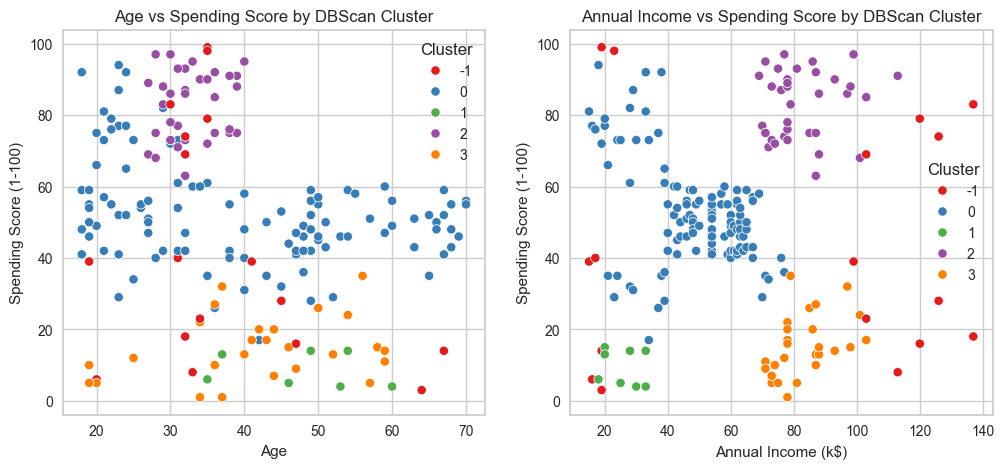

In [28]:
# Scatter plots for visualizing clusters based on Age vs. Spending Score and Annual Income vs. Spending Score
fig2, (ax_af) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=DB_clustered,
                hue='Cluster', ax=ax_af[0], palette='Set1', legend='full',s=45)
ax_af[0].set_title('Age vs Spending Score by DBScan Cluster')  

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=DB_clustered,
                hue='Cluster', palette='Set1', ax=ax_af[1], legend='full',s=45)
ax_af[1].set_title('Annual Income vs Spending Score by DBScan Cluster')

plt.setp(ax_af[0].get_legend().get_texts(), fontsize='10')
plt.setp(ax_af[1].get_legend().get_texts(), fontsize='10')
plt.show()

DBSCAN algorithm generated the following 4 clusters and 1 outlier group:
* clients with **low** annual income, **low** spending score and **medium** age
* clients with **low to medium** annual income, **medium to high** spending score and **vary** in age
* clients with **high** annual income, **low** spending score and **vary** in age
* clients with **high** annual income, **high** spending score and **medium** age

In [29]:
# Silhouette scores for evaluating clustering quality
DB_silhouette = silhouette_score(X_numeric, DB.labels_)
print(f'Silhouette Score for DBScan: {DB_silhouette}')

Silhouette Score for DBScan: 0.2960210490714429


In [30]:
DB_clustered['Cluster'].value_counts()

Cluster
 0    113
 2     35
 3     27
-1     17
 1      8
Name: count, dtype: int64

In [31]:
# Convert cluster -1 to 6, and 0 to 4 for plotting
DB_clustered['Cluster'] = DB_clustered['Cluster'].replace(-1, 6)
DB_clustered['Cluster'] = DB_clustered['Cluster'].replace(0, 4)

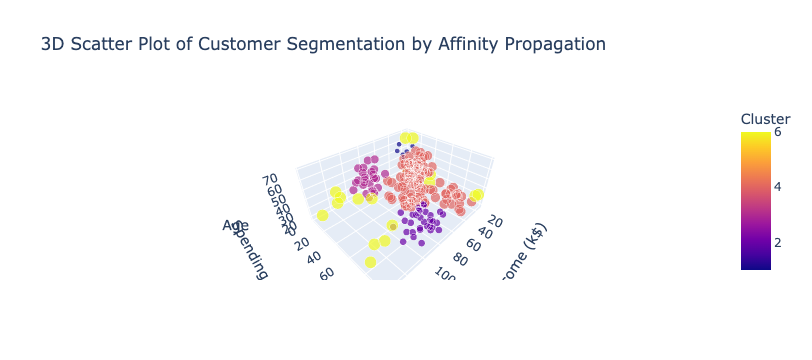

In [32]:
# 3D scatter plot for visualizing customer segmentation
fig = px.scatter_3d(DB_clustered[DB_clustered['Cluster']!=-1], x="Annual Income (k$)", y="Spending Score (1-100)", z="Age",
                    color = 'Cluster', size = 'Cluster', title="3D Scatter Plot of Customer Segmentation by Affinity Propagation")
fig.show()

## Conclusion
The analysis conducted in this report has led to insightful discoveries about the customer base, facilitated by the
strategic use of statistical and machine learning techniques. The decision to focus on continuous variables and
exclude binary ones from clustering analysis proved crucial in obtaining meaningful customer segments.
Additionally, the choice against standard scaling was vindicated by the homogeneity of the units and the ratio
nature of the data, which aligned well with the analytical objectives. The clustering results from both K-means
and DBSCAN algorithms provided a deep dive into the customer profiles, each bringing unique advantages to
the table. K-means offered clear segmentation, ideal for direct marketing strategies, while DBSCAN excelled in
identifying subtle patterns and outliers, providing a comprehensive view of customer diversity. The findings
from this study not only enhance my understanding of different consumer segments but also pave the way for
implementing refined marketing strategies that are tailored to meet the distinct needs of each customer group,
ultimately aiming to boost customer satisfaction and loyalty.